In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [43]:
class LSTMCell(nn.Module):
    """
    An implementation of Hochreiter & Schmidhuber:
    'Long-Short Term Memory' cell.
    http://www.bioinf.jku.at/publications/older/2604.pdf
    """
    def __init__(self, input_size, hidden_size, bias=True):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias
        self.x2h = nn.Linear(input_size, 4 * hidden_size, bias=bias)
        self.h2h = nn.Linear(hidden_size, 4 * hidden_size, bias=bias)
        self.reset_parameters()
    '''
    STEP 3: CREATE MODEL CLASS
    '''
    def reset_parameters(self):
        std = 1.0 / math.sqrt(self.hidden_size)
        for w in selhttps://github.com/doggy8088/A-Whirlwind-Tour-of-Python-zh-twf.parameters():
            w.data.uniform_(-std, std)

    def forward(self, x, hidden):
        hx, cx = hidden
        x = x.view(-1, x.size(1))
        gates = self.x2h(x) + self.h2h(hx)
        gates = gates.squeeze()
        ingate, forgetgate, cellgate, outgate = gates.chunk(4, 1)
        ingate = F.sigmoid(ingate)
        forgetgate =https://github.com/doggy8088/A-Whirlwind-Tour-of-Python-zh-tw F.sigmoid(forgetgate)
        cellgate = F.tanh(cellgate)
        outgate = F.sigmoid(outgate)
        cy = torch.mul(cx, forgetgate) +  torch.mul(ingate, cellgate)
        hy = torch.mul(outgate, F.tanh(cy))

        return (hy, cy)

SyntaxError: invalid syntax (<ipython-input-43-19deb244bcb2>, line 20)

In [ ]:

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias=True):
        super(LSTMMohttps://github.com/doggy8088/A-Whirlwind-Tour-of-Python-zh-twdel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        # Number of hidden layers
        self.layer_dim = layer_dim
        self.lstm = LSTMCell(input_dim, hidden_dim, layer_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        #print(x.shape,"x.shape")100, 28, 28
        if torch.cuda.is_available():
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))

        # Initialize cell state
        if torch.cuda.is_available():
            c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            c0 = Variable(torch.zeros(self.layer_dim, x.size(0), hidden_dim))

        outs = []
        cn = c0[0,:,:]
        hn = h0[0,:,:]

        for seq in range(x.size(1)):
            hn, cn = self.lstm(x[:,seq,:], (hn,cn))
            outs.append(hn)

        out = outs[-1].squeeze()
        out = self.fc(out)
        # out.size() --> 100, 10
        return out

# LSTMCcell explaination

![lstm](./ipynb_image/lstm_arc.jpg)
ref: 李弘毅 http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2016/Lecture/RNN%20(v2).pdf

![lstm_another](./ipynb_image/lstm_another_arc.png)
ref: https://www.itread01.com/content/1547138353.html

In [2]:
input_dim = 28
hidden_dim = 128
layer_dim = 1  # ONLY CHANGE IS HERE FROM ONE LAYER TO TWO LAYER
output_dim = 10

# start to looking LSTMCell

In [ ]:
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias
        self.x2h = nn.Linear(input_size, 4 * hidden_size, bias=bias)     # 28*512
        self.h2h = nn.Linear(hidden_size, 4 * hidden_size, bias=bias)    # 128*512
        self.reset_parameters()

In [ ]:
    def reset_parameters(self):
        std = 1.0 / math.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)

In [ ]:
    def forward(self, x, hidden):
        hx, cx = hidden
        x = x.view(-1, x.size(1))
        gates = self.x2h(x) + self.h2h(hx)                           # x2h = z, h2h = zi
        gates = gates.squeeze()
        ingate, forgetgate, cellgate, outgate = gates.chunk(4, 1)
        ingate = F.sigmoid(ingate)
        forgetgate = gates = self.x2h(x) + self.h2h(hx) F.sigmoid(forgetgate)
        cellgate = F.tanh(cellgate)
        outgate = F.sigmoid(outgate)
        cy = torch.mul(cx, forgetgate) +  torch.mul(ingate, cellgate) # cy = sigmoid(zf) + 
        hy = torch.mul(outgate, F.tanh(cy))                           # 

        return (hy, cy)

## relationship between LSTMCell and LSTMModel

```python
class LSTMModel(nn.Module):
    model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)        
    self.layer_dim = layer_dim
    self.lstm = LSTMCell(input_dim, hidden_dim, layer_dim)

class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):
```

## relationship between $\color{blue}{\text{input_size}}$ and  $\color{blue}{\text{input_dim}}$

In [3]:
input_size = input_dim
hidden_size = hidden_dim
bias = True
print('input_size = ' + str(input_size))
print('hidden_size = ' + str(hidden_size))
print('bias = ' + str(bias))

input_size = 28
hidden_size = 128
bias = True


## in LSTMCell __init__, what is x2h

In [4]:
x2h = nn.Linear(input_size, 4 * hidden_size, bias=bias)
print('x2h\t\t\t' + str(x2h))
print('x2h.weight.shape\t' + str(x2h.weight.shape))
print('x2h.bias.shape  \t' + str(x2h.bias.shape))

x2h			Linear(in_features=28, out_features=512, bias=True)
x2h.weight.shape	torch.Size([512, 28])
x2h.bias.shape  	torch.Size([512])


## in LSTMCell init, what is h2h

In [5]:
h2h = nn.Linear(hidden_size, 4 * hidden_size, bias=bias)
print('h2h\t\t\t' + str(h2h))
print('h2h.weight.shape\t' + str(h2h.weight.shape))
print('h2h.bias.shape  \t' + str(h2h.bias.shape))

h2h			Linear(in_features=128, out_features=512, bias=True)
h2h.weight.shape	torch.Size([512, 128])
h2h.bias.shape  	torch.Size([512])


## in LSTMCell forward (1)
```python
class LSTMCell(nn.Module):
    def forward(self, x, hidden):
        hx, cx = hidden
        x = x.view(-1, x.size(1))
        gates = self.x2h(x) + self.h2h(hx)   
```

![lstm_x2h](./ipynb_image/lstm_z.jpg)

In [ ]:
x2h 

In [ ]:
h2h

![lstm](./ipynb_image/lstm_code.jpg)

In [7]:
x = np.random.uniform(size=28)
x

array([0.12391729, 0.50678421, 0.46675831, 0.51107347, 0.4245179 ,
       0.31237322, 0.52732505, 0.42256535, 0.02678756, 0.6292324 ,
       0.78433458, 0.46798546, 0.26293351, 0.41522625, 0.318218  ,
       0.28708365, 0.21262692, 0.85536599, 0.63128721, 0.54387477,
       0.98303062, 0.80305686, 0.91437346, 0.83764352, 0.43622364,
       0.94119711, 0.8048368 , 0.75700112])

In [8]:
hn = np.random.uniform(size=128)
hn

array([0.10615313, 0.36155902, 0.44862399, 0.40851203, 0.30983418,
       0.5988416 , 0.1034623 , 0.77819937, 0.56643113, 0.04108196,
       0.25113469, 0.46300616, 0.63161179, 0.89954969, 0.6572328 ,
       0.74300082, 0.36104994, 0.51351677, 0.17867032, 0.70383985,
       0.40304291, 0.94785047, 0.49272398, 0.34189683, 0.00942435,
       0.96366127, 0.03216598, 0.12580701, 0.85616907, 0.70567649,
       0.16650692, 0.10786439, 0.4692811 , 0.98838087, 0.73006358,
       0.53382854, 0.75972848, 0.54159603, 0.94619127, 0.42758419,
       0.30266943, 0.72731099, 0.67403598, 0.36315002, 0.26021785,
       0.87997547, 0.85395045, 0.08603945, 0.8808212 , 0.20220159,
       0.77308362, 0.01202031, 0.14407329, 0.34649372, 0.78662467,
       0.96914692, 0.48194861, 0.14121417, 0.56645685, 0.91811252,
       0.32673359, 0.16988181, 0.26571623, 0.69151312, 0.14059881,
       0.14619194, 0.50707507, 0.45898698, 0.96010259, 0.39586481,
       0.5155281 , 0.31753012, 0.92634141, 0.10996943, 0.62292

In [9]:
x2h(x).size()

AttributeError: 'numpy.ndarray' object has no attribute 'dim'

In [10]:
x = inputs[0]
print(type(x))
print(x.size())

NameError: name 'inputs' is not defined

In [55]:
xn = x.view(-1,x.size(1))

In [80]:
x.squeeze().size()

torch.Size([28, 28])

In [76]:
layer_dim = 1
hidden_dim = 128
#h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
h0 = Variable(torch.zeros(layer_dim, x.size(0), hidden_dim).cuda())
c0 = Variable(torch.zeros(layer_dim, x.size(0), hidden_dim).cuda())
print('h0.size = ' + str(h0.size()))
print('c0.size = ' + str(c0.size()))

h0.size = torch.Size([1, 1, 128])
c0.size = torch.Size([1, 1, 128])


In [20]:
xxx = [3, 2.2, 8.8, 6]

In [22]:
xxx.size(0)

AttributeError: 'list' object has no attribute 'size'

In [23]:
x.size()

TypeError: 'int' object is not callable

In [24]:
x[0]

array([0.41959043, 0.66354645, 0.32679139, 0.89560696, 0.88122791,
       0.44116725, 0.2319549 , 0.20337702, 0.32658795, 0.96374005,
       0.52722275, 0.61603115, 0.28896504, 0.70517421, 0.04906607,
       0.13845368, 0.91730347, 0.48181953, 0.6893669 , 0.61514601,
       0.2181168 , 0.65531249, 0.66858463, 0.6224446 , 0.12197584,
       0.0171417 , 0.73596117, 0.59561187])

In [44]:
inputs[0].size(1)

28

# geting information about c0,h0

In [11]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
import matplotlib.pyplot as plt

cuda = True if torch.cuda.is_available() else False    
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor    

torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)

In [12]:
'''
STEP 1: LOADING DATASET
'''
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)
 
test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())
 
batch_size = 100
n_iters = 6000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

In [13]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)
 
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [14]:
for i, (image,label) in enumerate(train_loader):
    print('i '+ str(i))
    print('image size ' + str(image.shape))
    print('label size ' + str(label.shape))
    break

i 0
image size torch.Size([100, 1, 28, 28])
label size torch.Size([100])


In [15]:
for i, (images,label) in enumerate(train_loader):
    print('images size ' + str(images.shape))
    print('images view ' + str(images.view(-1,28,28).cuda().shape))
    images = Variable(images.view(-1,28,28).cuda())
    break
print('vairable of images = ' + str(images.shape))

images size torch.Size([100, 1, 28, 28])
images view torch.Size([100, 28, 28])
vairable of images = torch.Size([100, 28, 28])


In [16]:
layer_dim = 1
x = images
hidden_dim = 128
h0 = Variable(torch.zeros(layer_dim, x.size(0), hidden_dim).cuda())
c0 = Variable(torch.zeros(layer_dim, x.size(0), hidden_dim).cuda())

In [17]:
print('h0 shape = ' + str(h0.shape))
print('c0 shape = ' + str(c0.shape))

h0 shape = torch.Size([1, 100, 128])
c0 shape = torch.Size([1, 100, 128])


In [18]:
outs = []
cn = c0[0,:,:]
hn = h0[0,:,:]
print('cn.shape = ' + str(cn.shape))
print('hn shape = ' + str(hn.shape))

cn.shape = torch.Size([100, 128])
hn shape = torch.Size([100, 128])


In [19]:
hn

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [ ]:
for seq in range(x.size(1)):
    hn, cn = self.lstm(x[:,seq,:], (hn,cn))
    #outs.append(hn)

In [254]:
print('tuple lenght = ' + str(len((hn,cn))))
(hn,cn)

tuple lenght = 2


(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0'),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0'))

In [20]:
images[0,:,:].shape

torch.Size([28, 28])

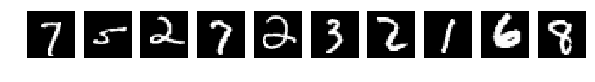

In [21]:
plt.figure(figsize=(10,10)) 

def plot_mnist(index):
    ax = plt.subplot(1,10,index+1) 
    plt.axis('off')

    plt.imshow(images[index].cpu(), cmap='gray') 
    
for i,data in enumerate(images,0): 
    if i == 1: break 
    plot_mnist(0+i*4)
    plot_mnist(1+i*4)
    plot_mnist(2+i*4)
    plot_mnist(3+i*4)
    plot_mnist(4+i*4)
    plot_mnist(5+i*4)
    plot_mnist(6+i*4)
    plot_mnist(7+i*4)
    plot_mnist(8+i*4)
    plot_mnist(9+i*4)

In [23]:
x = images
for seq in range(x.size(1)):
    #hn, cn = self.lstm(x[:,seq,:], (hn,cn))
    p1 = x[:,seq,:]
    p2 = (hn,cn)
    break
print('p1 type = ' + str(type(p1)))
print('p1 shape = ' + str(p1.shape))

p1 type = <class 'torch.Tensor'>
p1 shape = torch.Size([100, 28])


tensor(7)


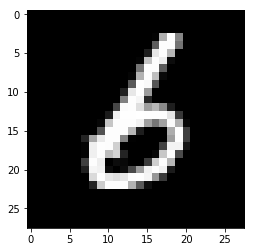

In [24]:
plt.imshow(image[0][0].cpu(), cmap='gray')
print(label[0])

In [ ]:
input_size = input_size
hidden_size = hidden_size
bias = bias
x2h = nn.Linear(input_size, 4 * hidden_size, bias=bias)     # 28*512
h2h = nn.Linear(hidden_size, 4 * hidden_size, bias=bias)    # 128*512

hx, cx = hidden
x = x.view(-1, x.size(1))
gates = self.x2h(x) + se        for seq in range(x.size(1)):
            hn, cn = self.lstm(x[:,seq,:], (hn,cn))
            outs.append(hn)lf.h2h(hx)                           # x2h = z, h2h = zi
gates = gates.squeeze()
ingate, forgetgate, cellgate, outgate = gates.chunk(4, 1)
ingate = F.sigmoid(ingate)
forgetgate = F.sigmoid(forgetgate)
cellgate = F.tanh(cellgate)
outgate = F.sigmoid(outhn (100,128)
gate)
cy = torch.mul(cx, forgetgate) +  torch.mul(ingate, cellgate) # cy = sigmoid(zf) + 
hy = torch.mul(outgate, F.tanh(cy))                           # 


In [25]:
input_size = 28
hidden_size = 128
bias = True
x2h = nn.Linear(input_size, 4 * hidden_size, bias=bias)     # 28*512
h2h = nn.Linear(hidden_size, 4 * hidden_size, bias=bias)    # 128*512

In [259]:
x2h(x[:,0,:])

RuntimeError: Expected object of backend CPU but got backend CUDA for argument #4 'mat1'

In [160]:
h2h(hn[0].cpu()).shape

torch.Size([512])

In [161]:
gate = x2h(x[0,0,:].cpu()) + h2h(hn[0].cpu())

In [163]:
gate.shape

torch.Size([512])

In [26]:
np.set_printoptions(suppress=True)

In [203]:
gate = gate.squeeze()

In [205]:
ingat, forget, collect, output = gate.chunk(4,0)

In [260]:
images.shape

torch.Size([100, 28, 28])

In [261]:
x = images[:,0,:]
x.shape

torch.Size([100, 28])

In [262]:
hidden = (hn,cn)

In [263]:
hx, cx = hidden

In [265]:
a = x2h(x.cpu())

In [214]:
a.shape

torch.Size([100, 512])

In [215]:
b = h2h(hn.cpu())

In [216]:
b.shape

torch.Size([100, 512])

In [217]:
c = a+b

In [218]:
c.shape

torch.Size([100, 512])

In [29]:
seq = 0
x = images[:,seq,:]
x.shape

torch.Size([100, 28])

In [30]:
x = x.view(-1,x.size(1))
x.shape

torch.Size([100, 28])

In [33]:
hidden = (hn,cn)
hx,cx = hidden
hx.shape

torch.Size([100, 128])

In [34]:
gates = x2h(x.cpu()) + h2h(hx.cpu())
gates.shape

torch.Size([100, 512])

In [233]:
gates = gates.squeeze()
gates.shape

torch.Size([100, 512])

In [39]:
a, b, c, d = gates.chunk(4,1)

In [40]:
print('a shape = ' + str(a.shape))
print('b shape = ' + str(b.shape))
print('c shape = ' + str(c.shape))
print('d shape = ' + str(d.shape))

a shape = torch.Size([100, 128])
b shape = torch.Size([100, 128])
c shape = torch.Size([100, 128])
d shape = torch.Size([100, 128])


In [240]:
import torch
import torch.nn as nn
import torchvision.transforms as trimport torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
import matplotlib.pyplot as plt



cuda = True if torch.cuda.is_available() else False
    
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor    

torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)ansforms
import torchvision.datasets as dsets
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
import matplotlib.pyplot as plt



cuda = True if torch.cuda.is_available() else False
    
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor    

torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)